Assuming you have the data folder in your working directory in the following format:
'working_directory/HW1/dataset_name/datasetGestureLibrary_X_Train.txt for x axis

In [178]:
require(data.table)
require(ggplot2)
require(repr)
options(repr.plot.width=15, repr.plot.height=8)
current_folder=getwd()
dataset='UWave'

train_data_path_x=sprintf('%s/HW1/%s/%sGestureLibrary_X_TRAIN.txt',current_folder,dataset,dataset)
train_data_path_y=sprintf('%s/HW1/%s/%sGestureLibrary_Y_TRAIN.txt',current_folder,dataset,dataset)
train_data_path_z=sprintf('%s/HW1/%s/%sGestureLibrary_Z_TRAIN.txt',current_folder,dataset,dataset)

train_data_x=fread(train_data_path_x)
train_data_y=fread(train_data_path_y)
train_data_z=fread(train_data_path_z)
head(train_data_x)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.63523879,0.65370767,0.67217655,0.69064543,0.70911432


These are for 3D graph of position 

In [180]:
require(scatterplot3d)
require(tidyverse)
require(ggplot2)
require(reshape)
require(directlabels)
require(dplyr)
require(DT)
install.packages("scatterplot3d")
library("scatterplot3d") 

Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”Loading required package: directlabels
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘directlabels’”Loading required package: DT
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DT’”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In order to loose class information, create a class vector
Creating the position function to get position by using acceleration. 
The function compute two times cumsum()

In [153]:
class = c()
for(i in 1:8) 
{
  class <- class %>% append(match(i, train_data_x$V1)) 
}
class
position <- function(train_data){
  class <- train_data$V1
  train_data$V1 <- 0
  position <- train_data %>% mutate(V1=0) %>% apply(1, cumsum) %>% t() %>% apply(1, cumsum) %>% t() %>% as.data.frame() %>% mutate(V1=class)
  return(position)
}
  
x_position <- position(train_data_x) %>% as.matrix()
y_position <- position(train_data_y) %>% as.matrix()
z_position <- position(train_data_z) %>% as.matrix()

[1] 11 15  4  5  2  1  7  6

3D Graph is creating...

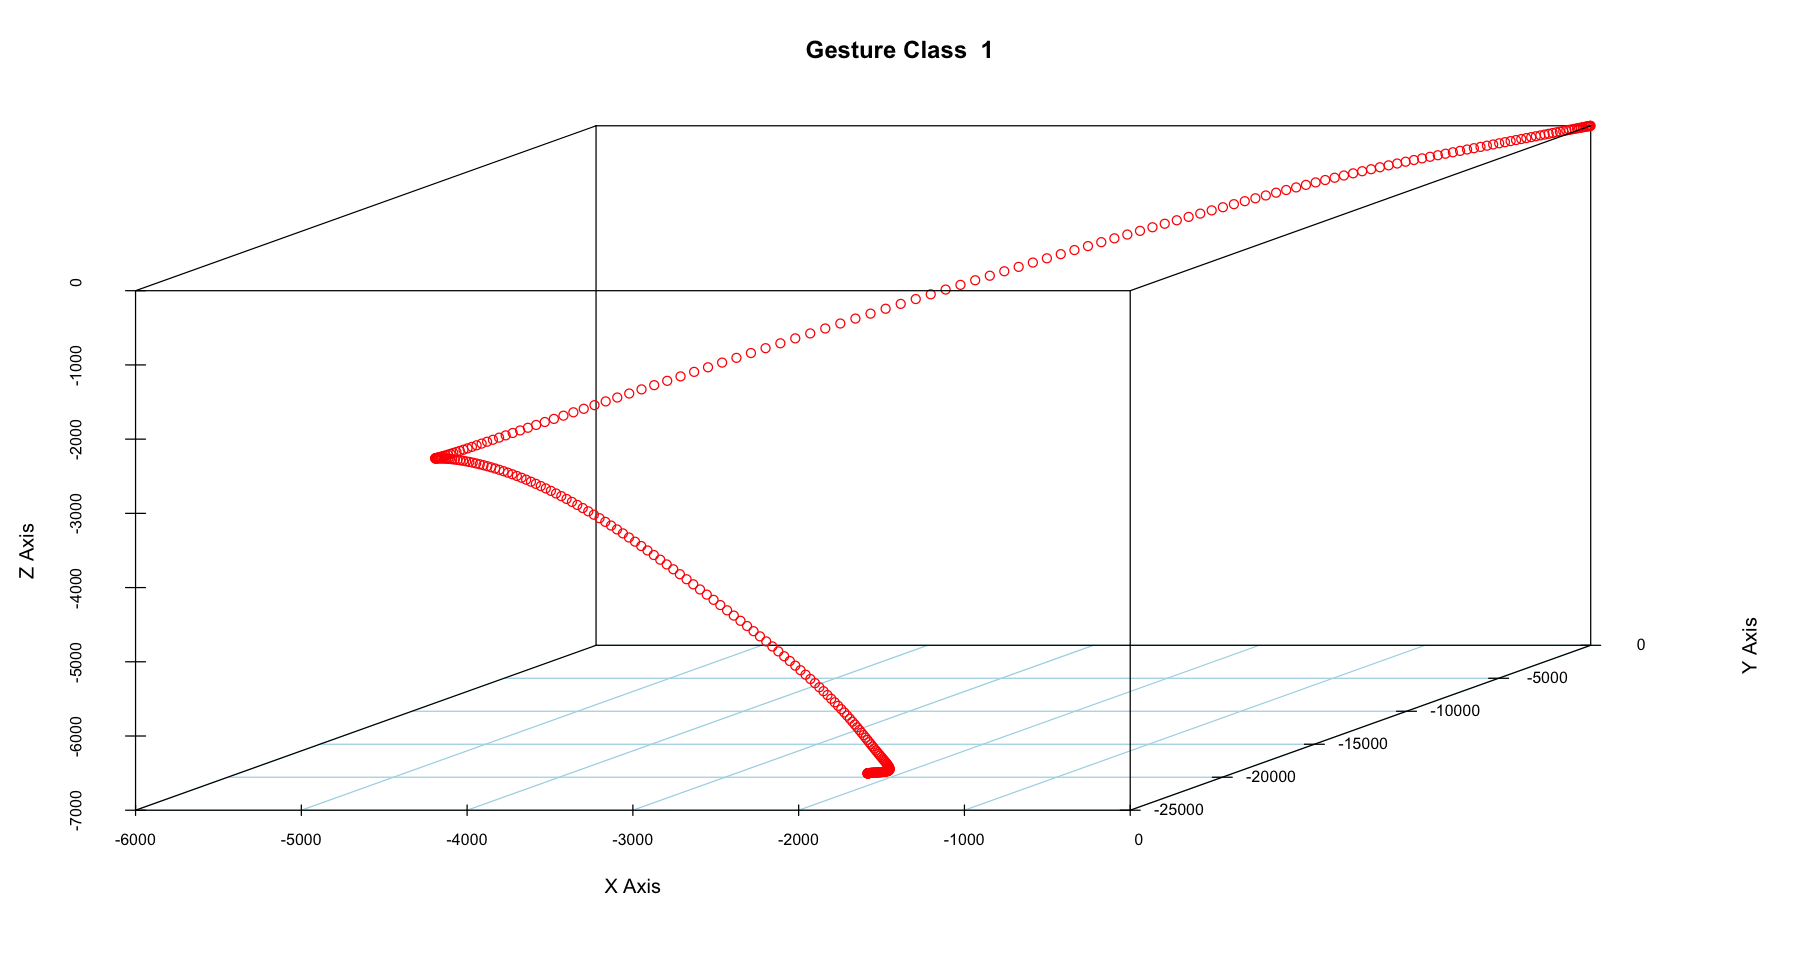

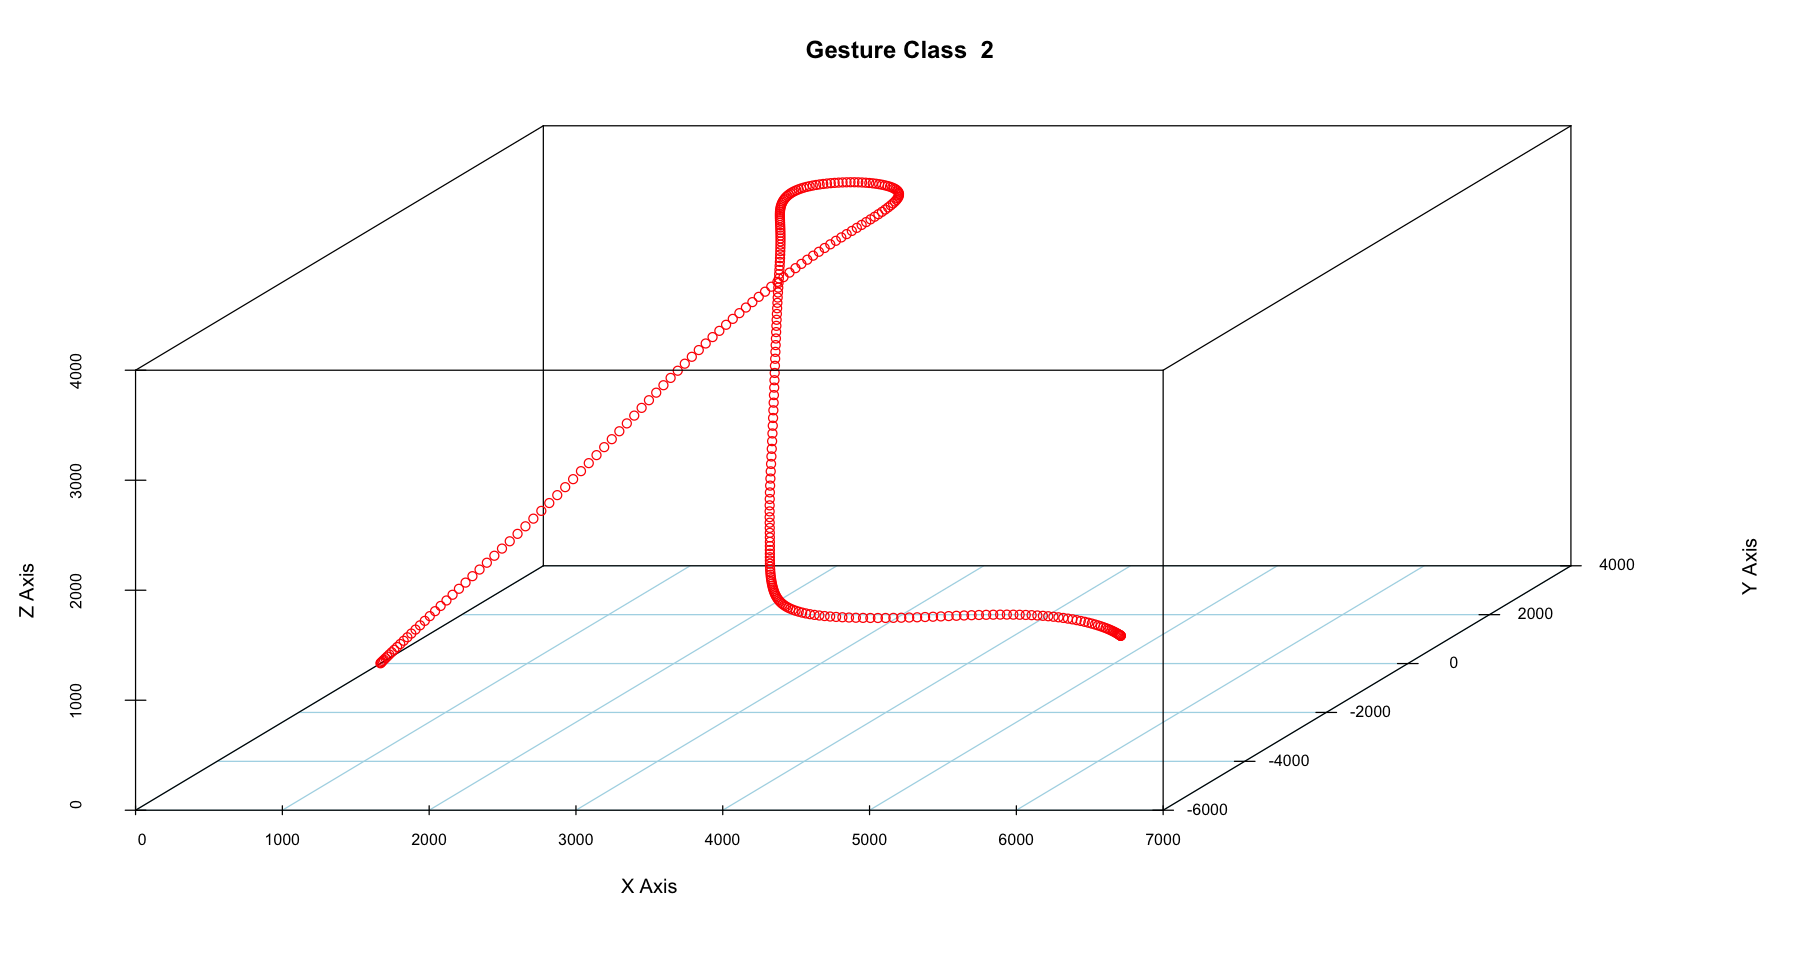

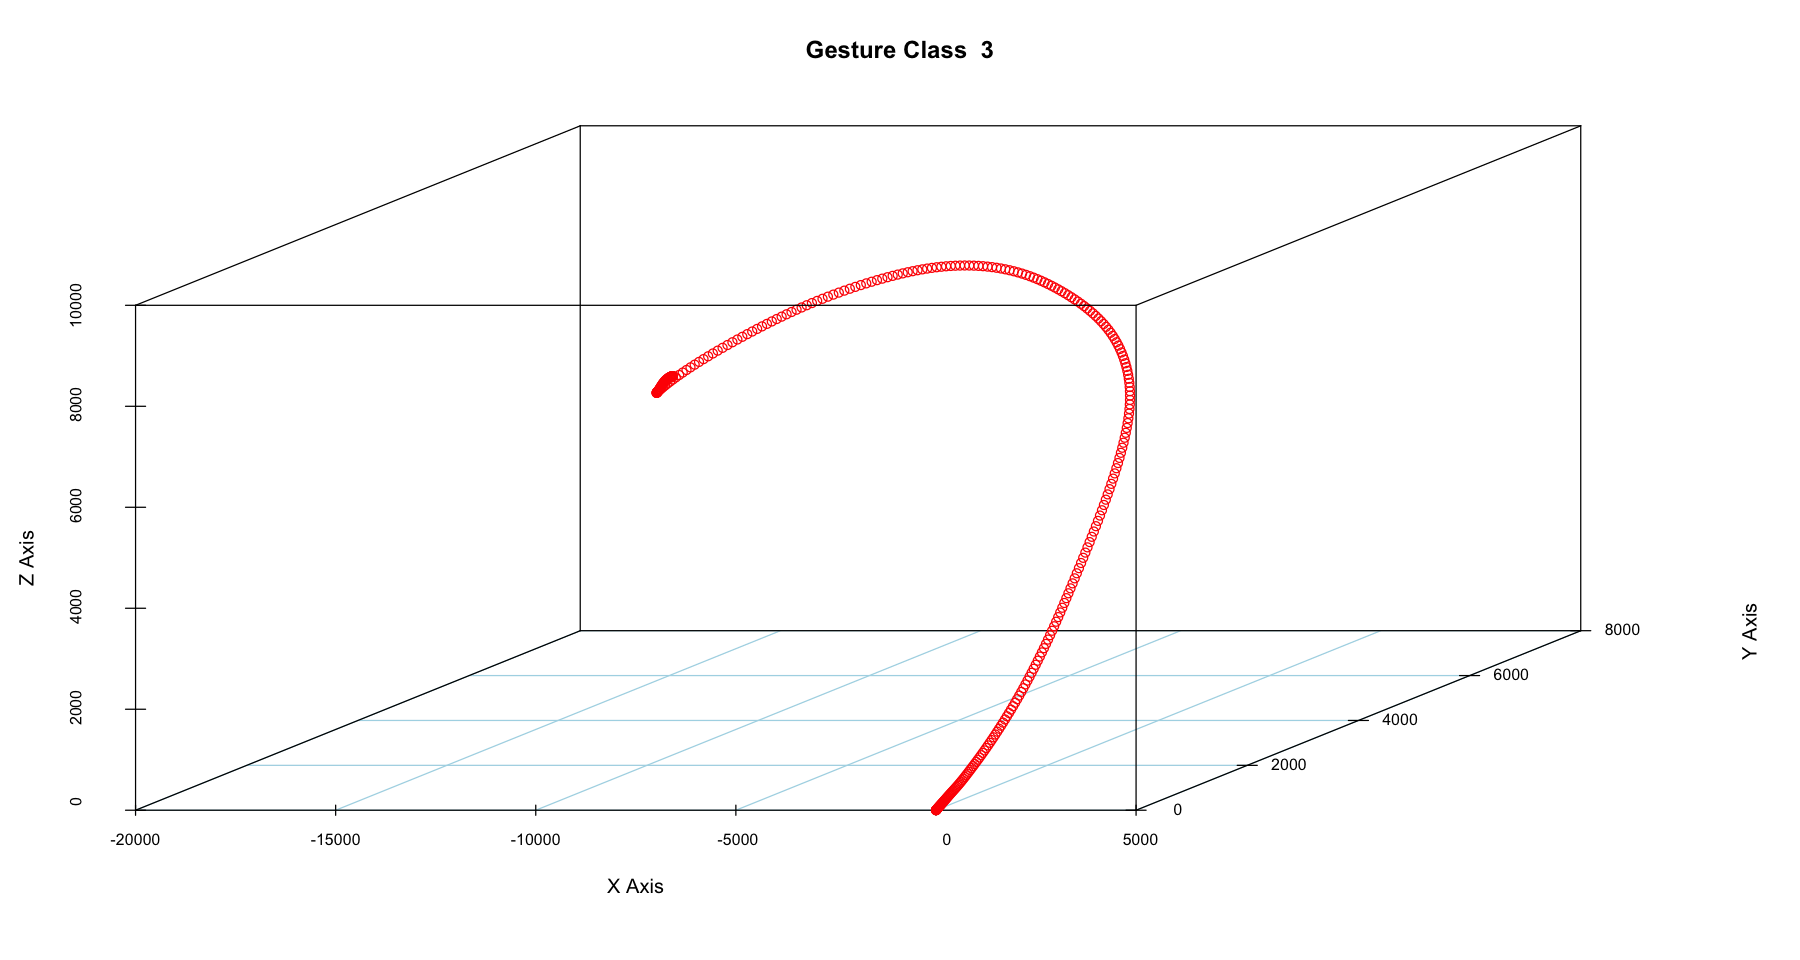

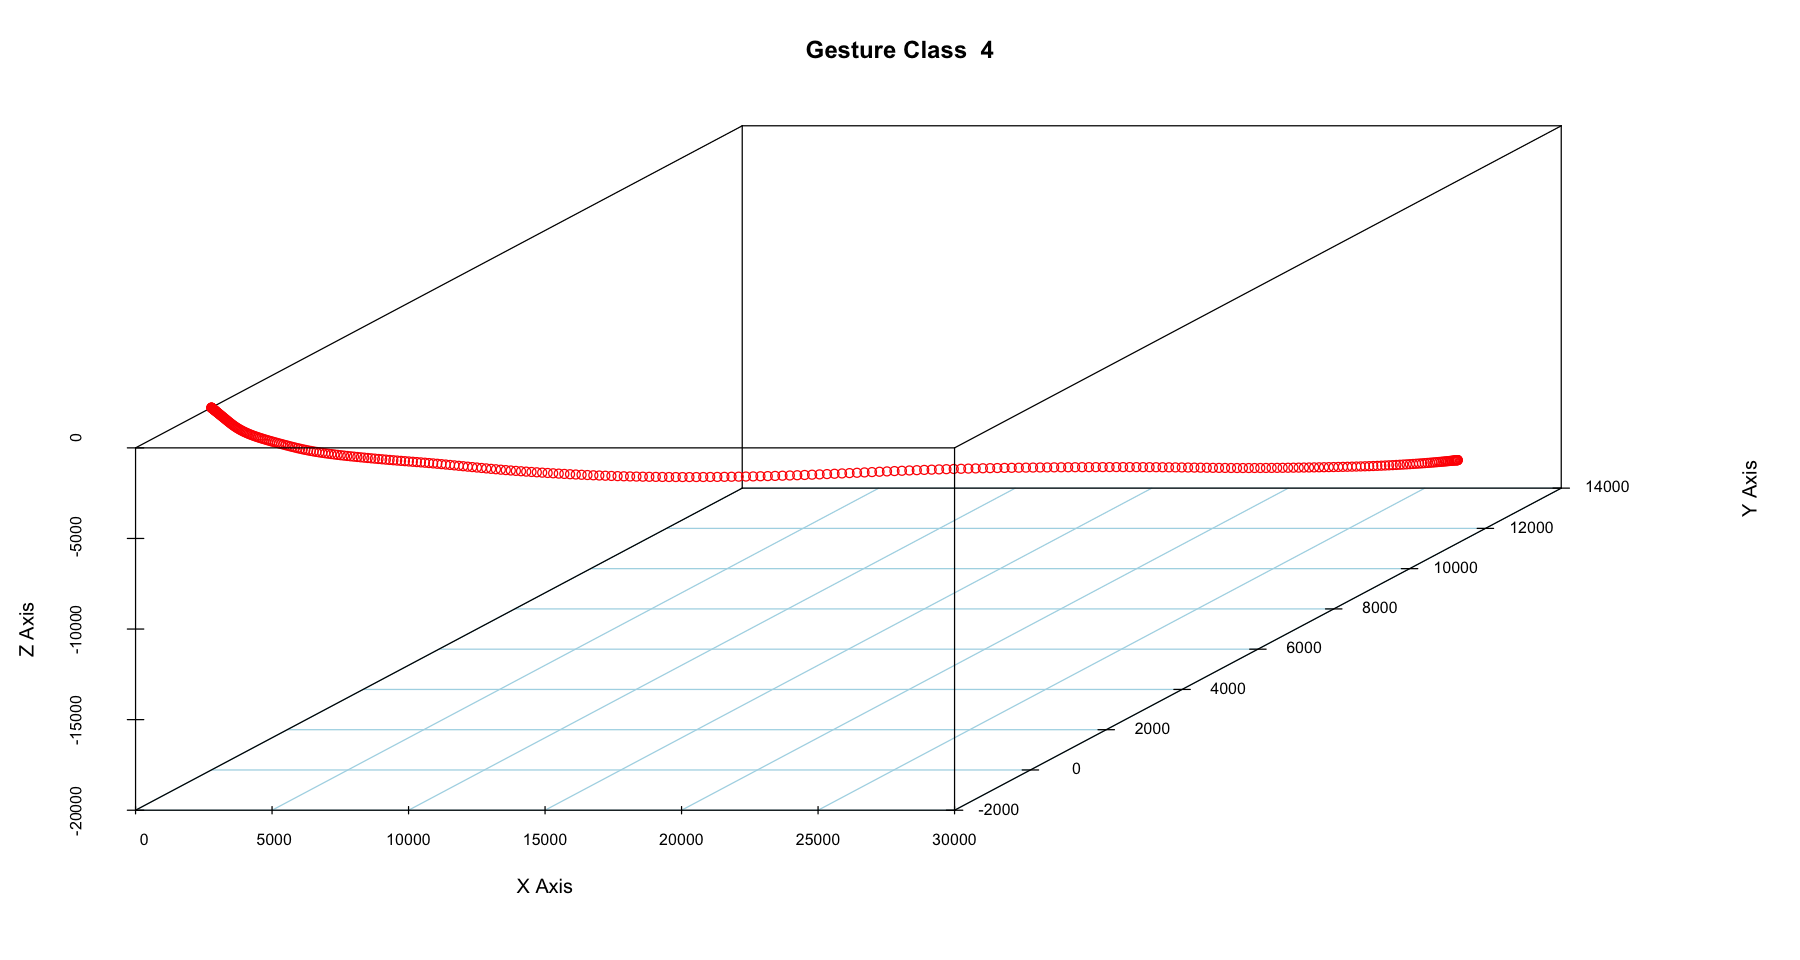

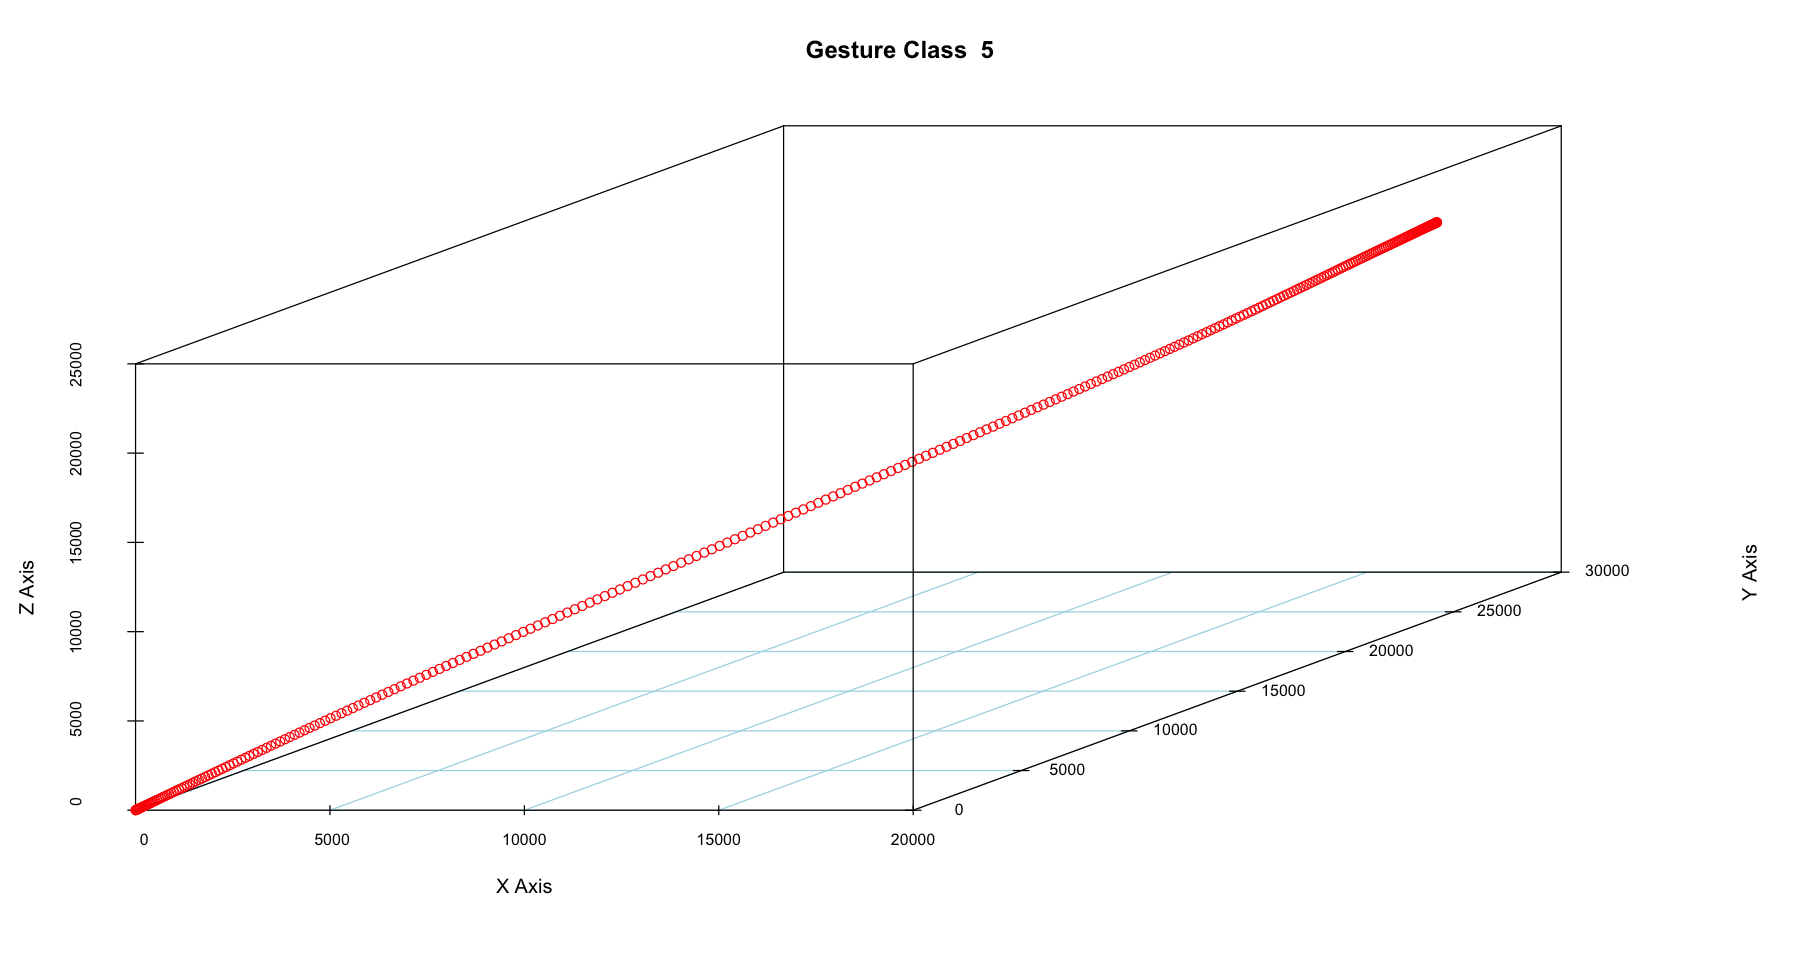

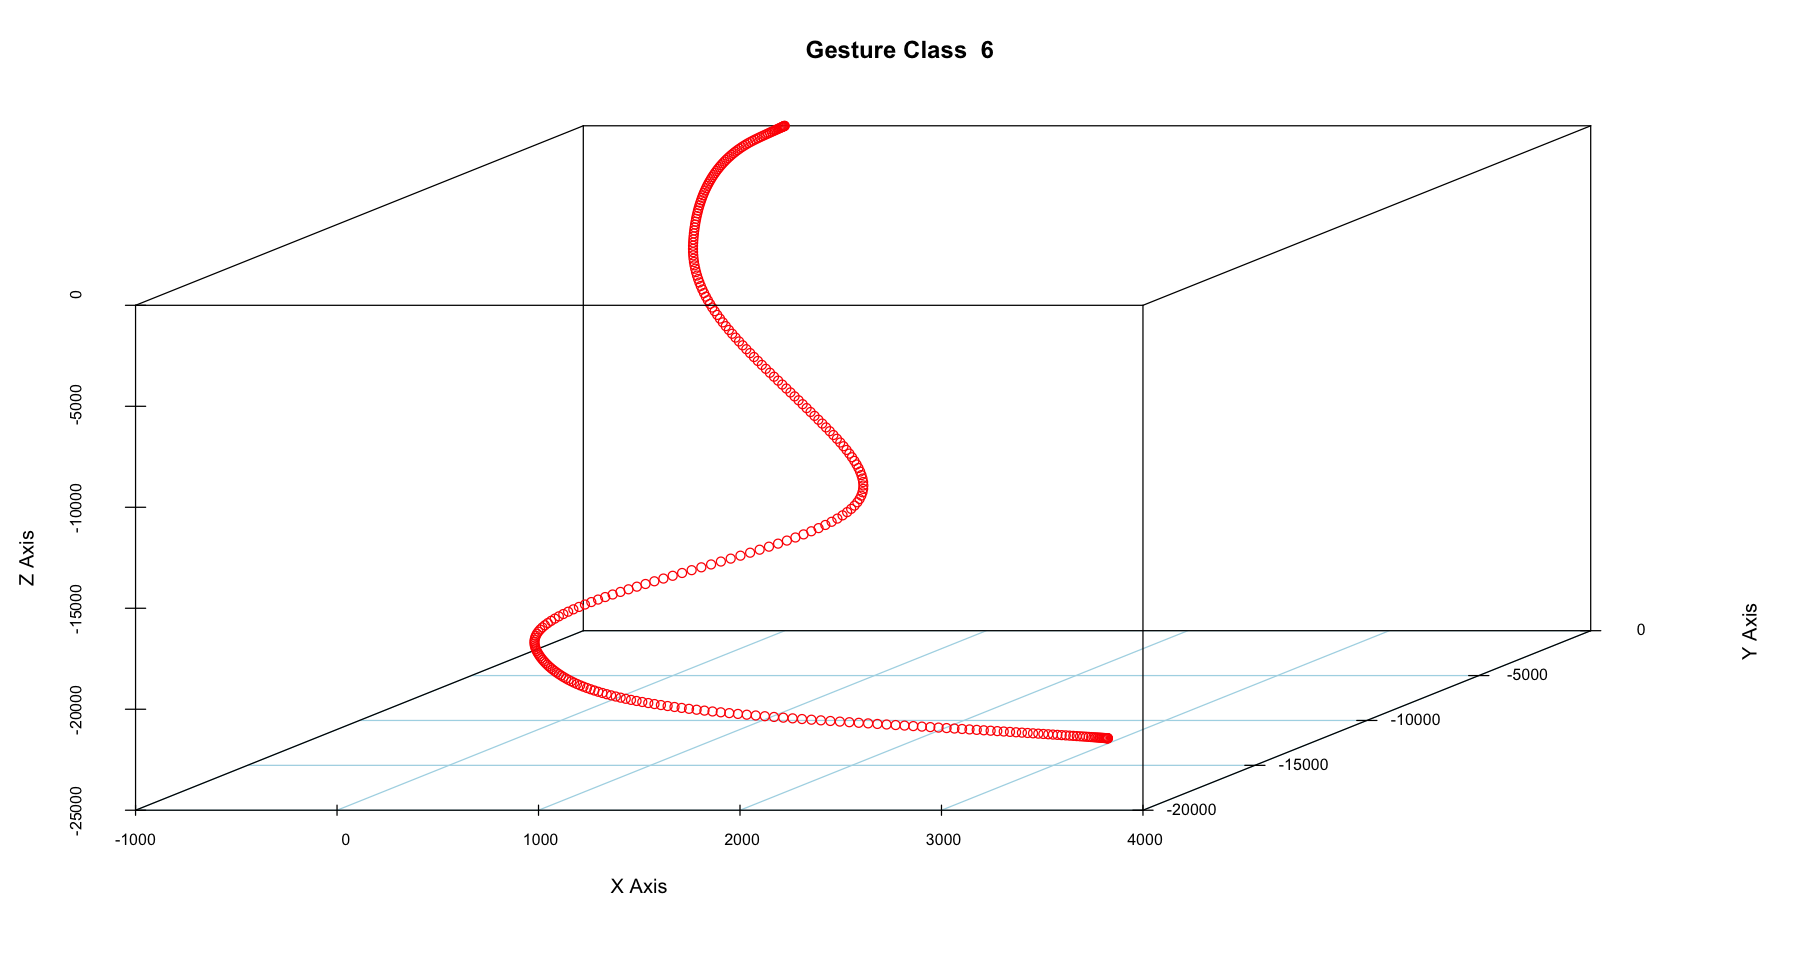

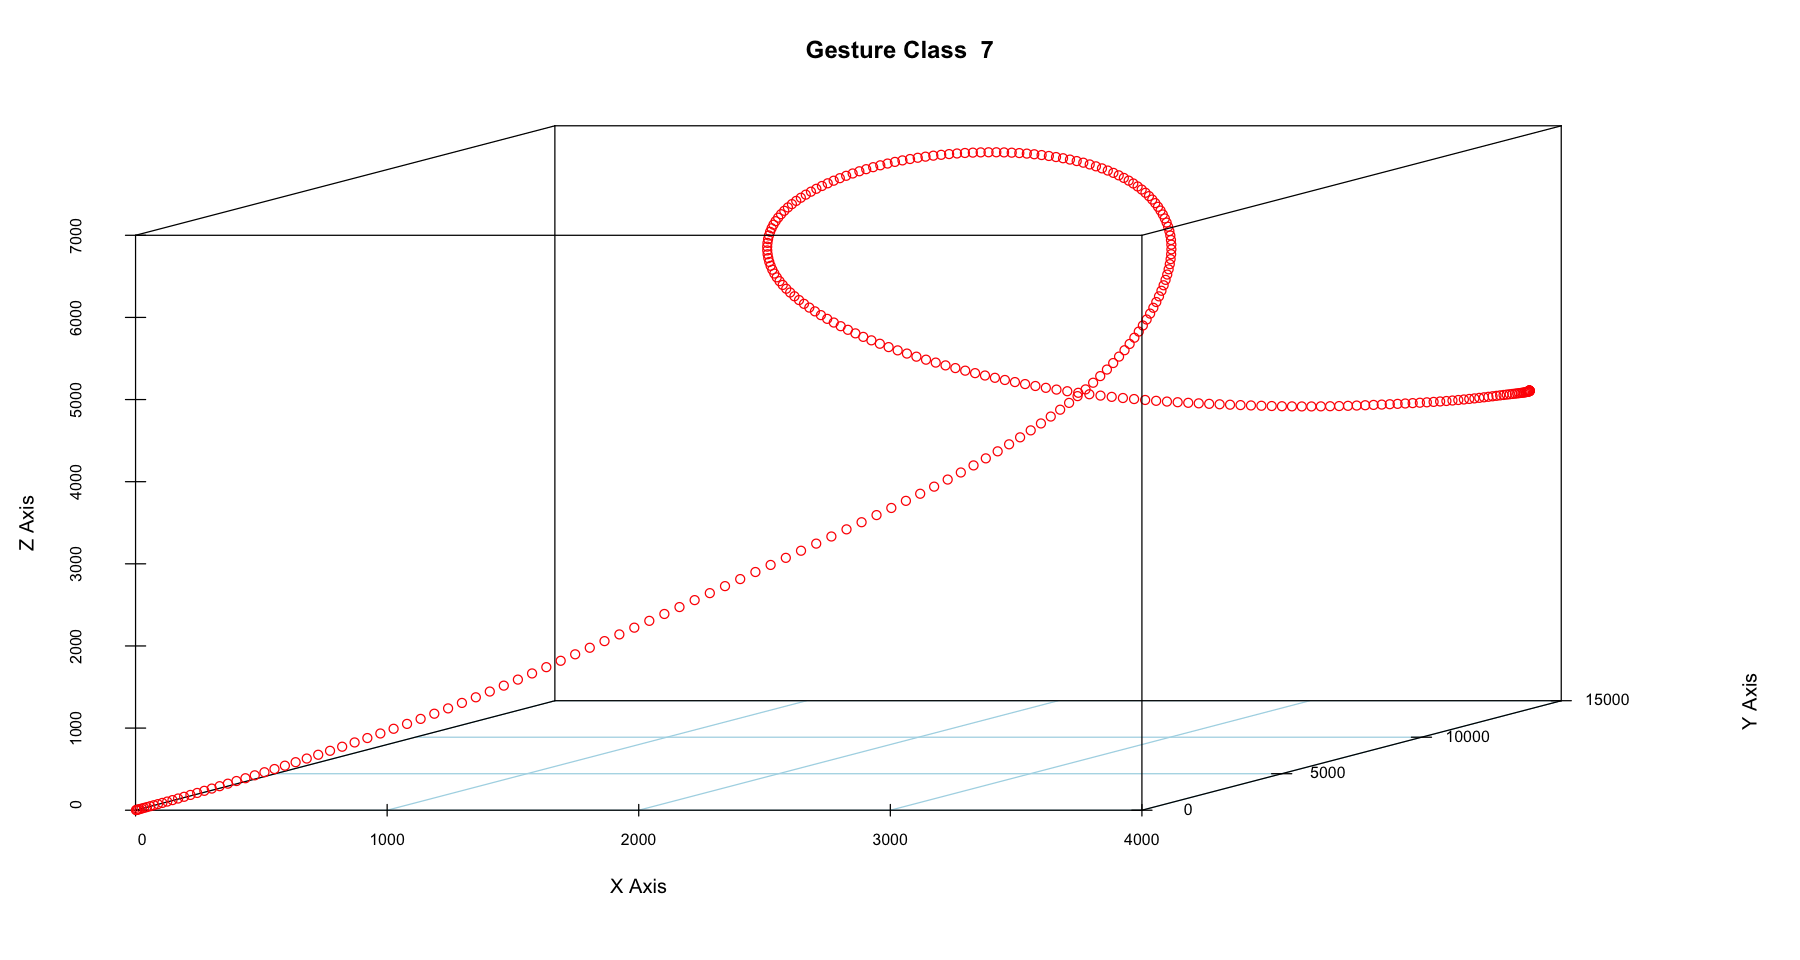

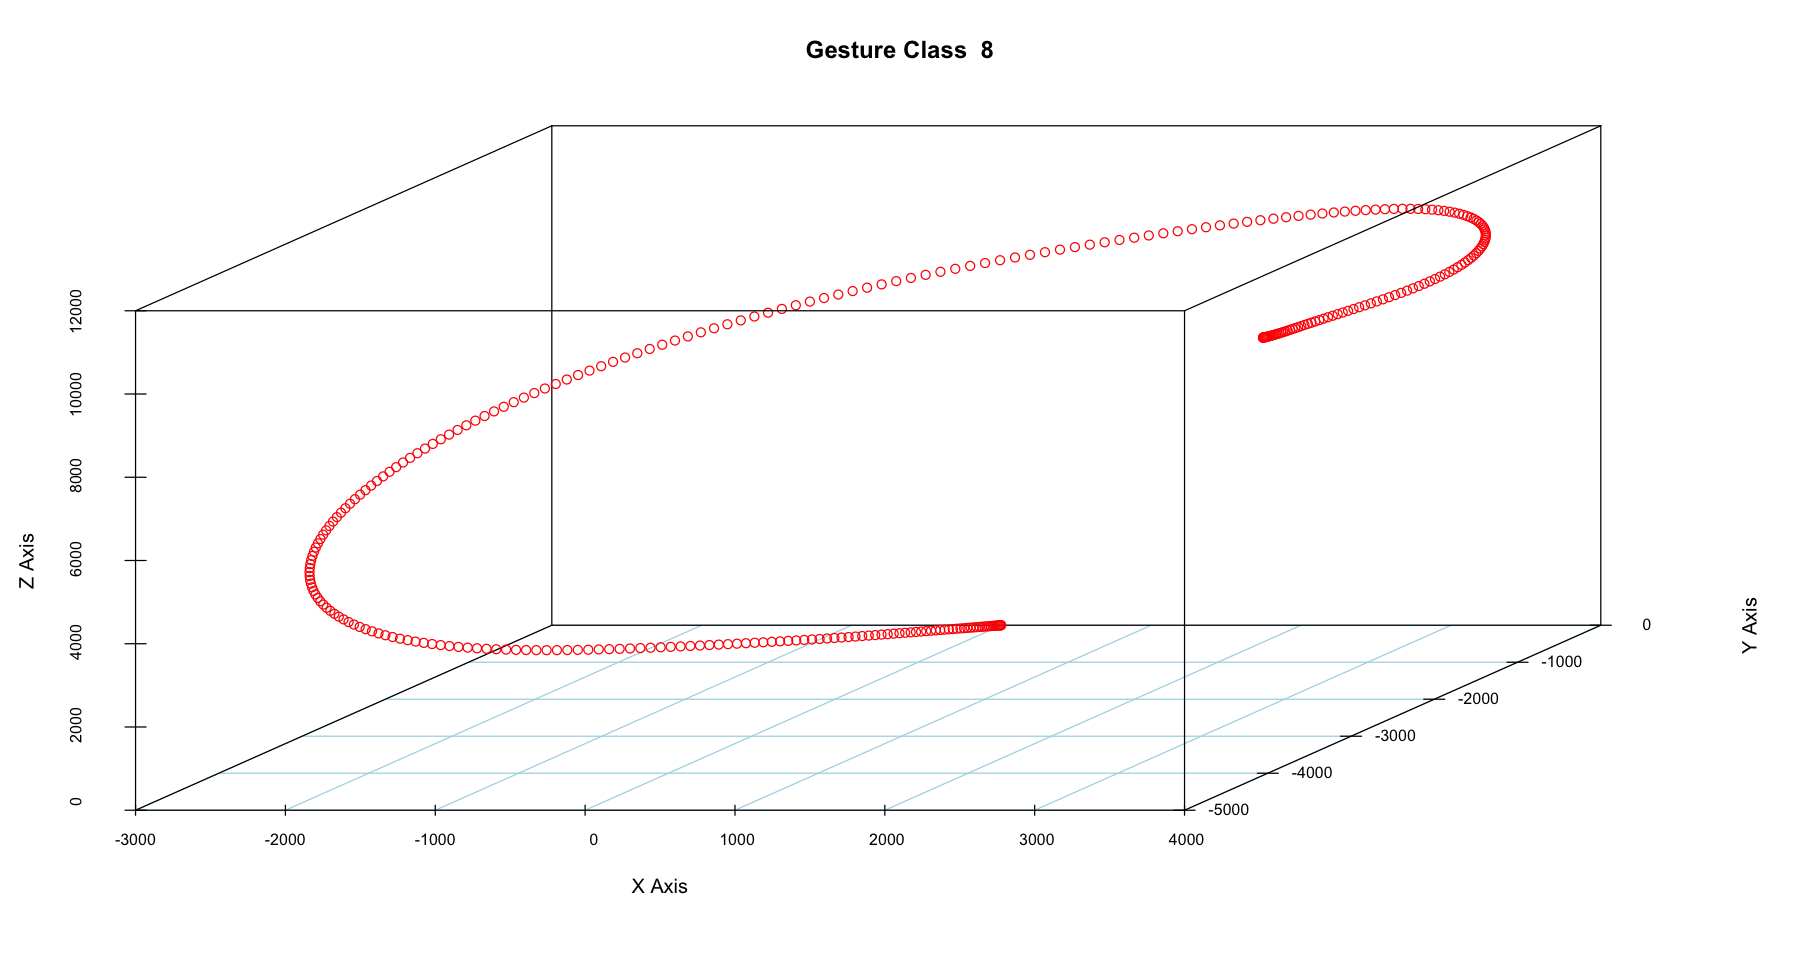

In [181]:
plot_3d <- function(class){
  for(i in 1:8) {
    scatterplot3d(x_position[class[i],-1], y_position[class[i],-1], z_position[class[i],-1], main = paste("Gesture Class ", x_position[class[i],1]) ,xlab = "X Axis", ylab = "Y Axis", zlab = "Z Axis", col.grid="lightblue",type = "p", color = "red")
  }
}
  
plot_3d(class)

melting the data to long format, but also calculating square of position values.
Then getting the distance from the origin(0,0,0), We have 1D data.

In [156]:
x_long <- x_position %>% as.data.table() %>% mutate(id = seq.int(nrow(x_position))) %>% melt(id.vars = c("id", "V1")) %>% transmute(id=id, time=variable, X=value*value, class=V1)

y_long <- y_position %>% as.data.table() %>% mutate(id = seq.int(nrow(x_position))) %>% melt(id.vars = c("id", "V1")) %>% transmute(id=id, time=variable, Y=value*value, class=V1)

z_long <- z_position %>% as.data.table() %>% mutate(id = seq.int(nrow(x_position))) %>% melt(id.vars = c("id", "V1")) %>% transmute(id=id, time=variable, Z=value*value, class=V1)

long_train <- x_long %>% select(-class) %>% mutate(value= sqrt(x_long$X+y_long$Y+z_long$Z), class = x_long$class)  %>% mutate(time = sub(".", "", time)) 

long_train$time <- as.numeric(long_train$time) - 1

long_train <-long_train %>% select(-X) %>% as.data.table()


id,time,X,class
1,V2,9.256393e-02,6
2,V2,2.648141e+00,5
3,V2,4.372866e-01,5
4,V2,2.688199e-05,3
5,V2,1.654305e+00,4
6,V2,2.296829e-01,8
7,V2,2.173642e+00,7
8,V2,9.320990e-02,4
9,V2,9.619890e-01,4
10,V2,1.385513e+00,6


Heatmap presentation:

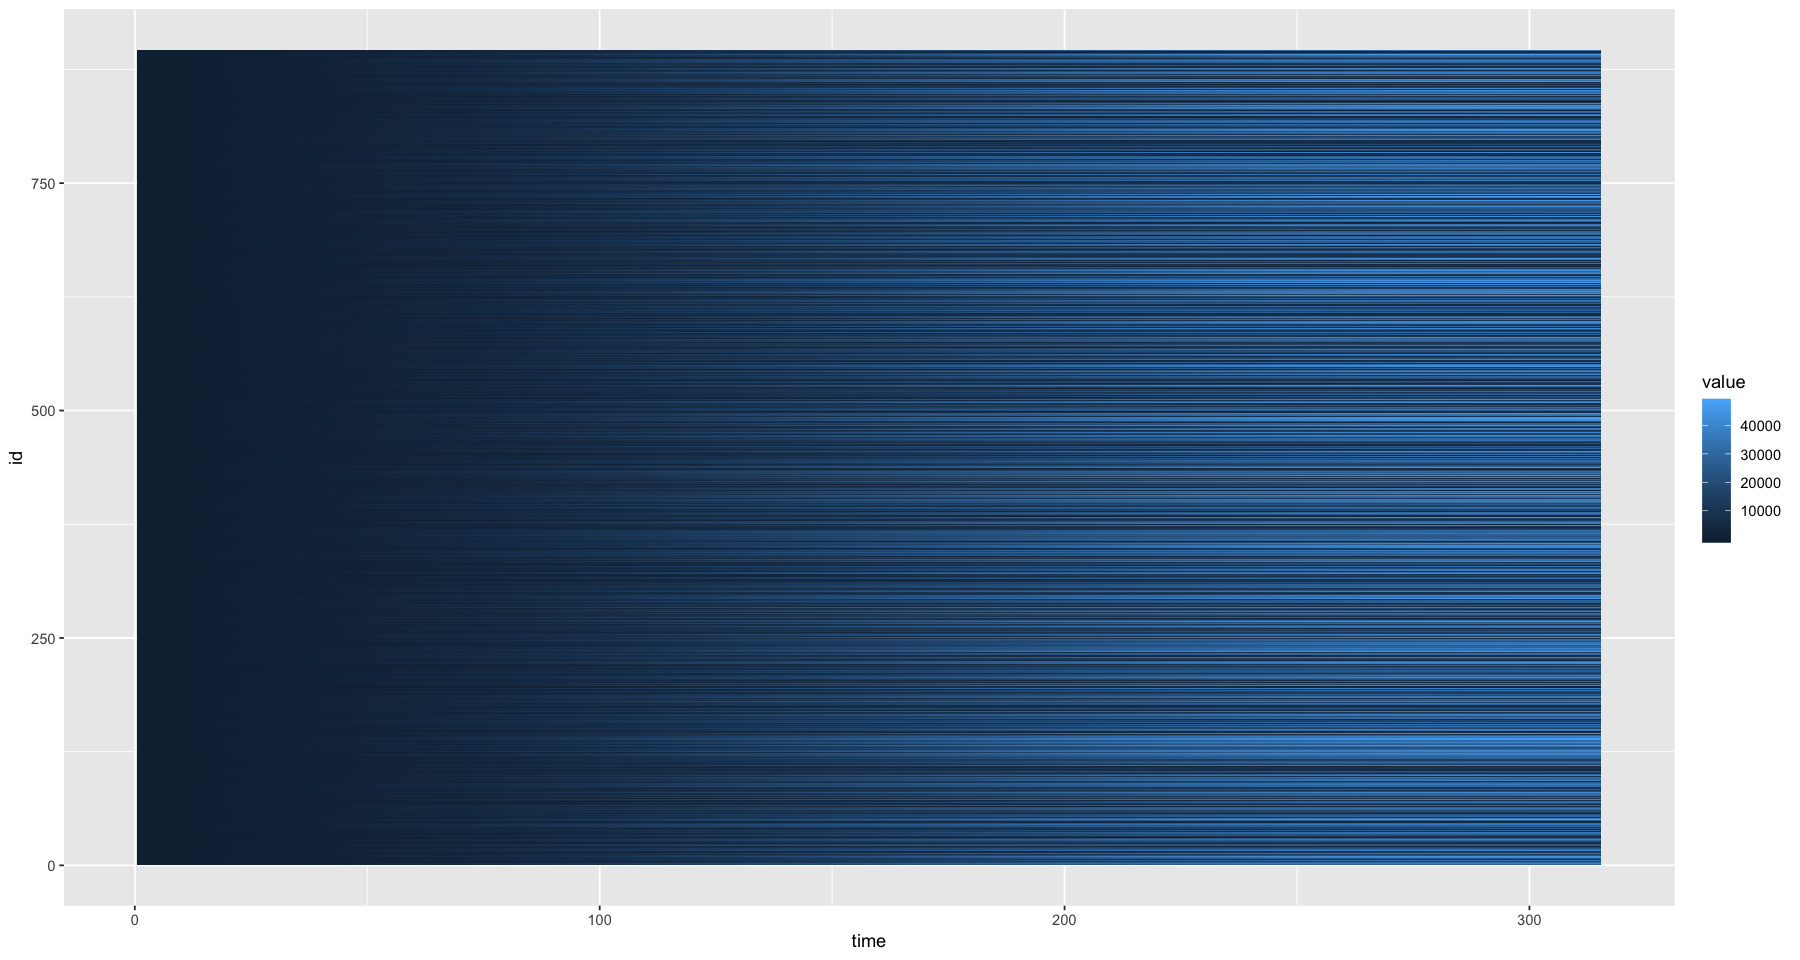

In [164]:
ggplot(long_train, aes(time,id, fill= value)) + 
  geom_tile()

Classes ‘data.table’ and 'data.frame':	282240 obs. of  5 variables:
 $ id         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ time       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ value      : num  2.631 2.507 0.863 0.486 1.425 ...
 $ class      : chr  "6" "5" "5" "3" ...
 $ interval_id: num  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


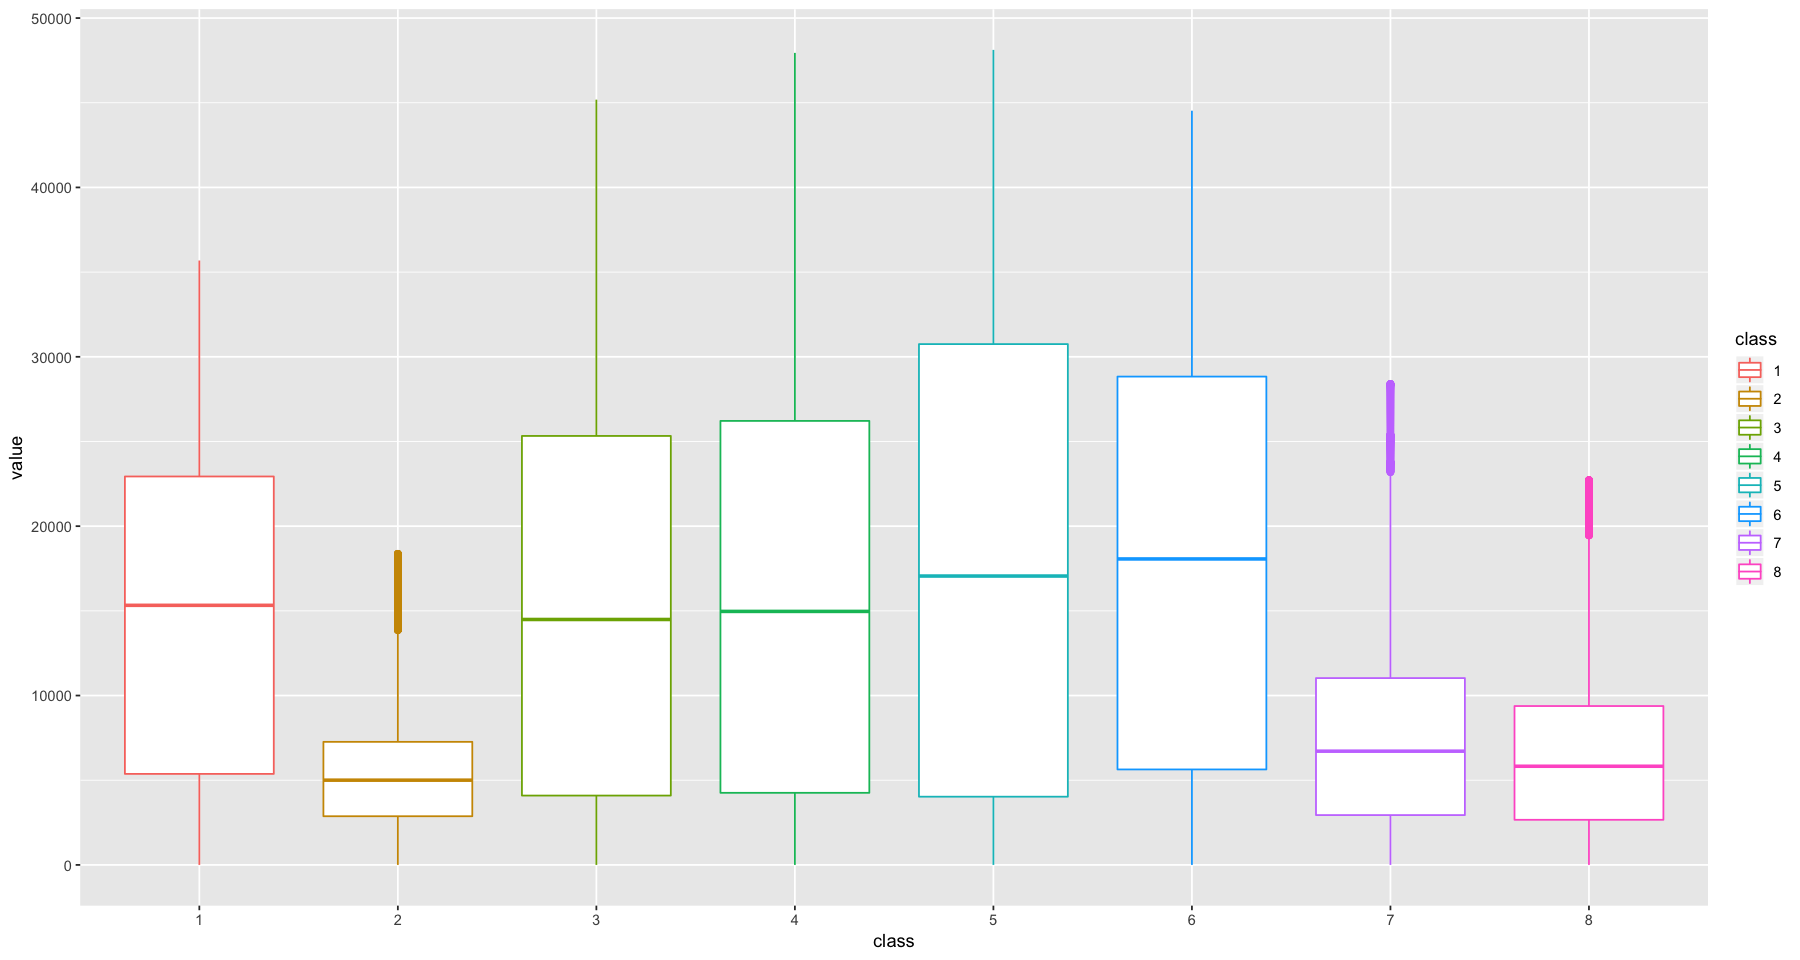

In [182]:
str(long_train)
long_train[,class:=as.character(class)]
ggplot(long_train, aes(x=class, y=value, color=class)) +
  geom_boxplot()

Calculating some stats of these distance

In [170]:
stats=long_train[,list(mean=mean(value),median=median(value),stdev=sd(value)),by=list(class,id)]
head(stats)
summary(stats)

class,id,mean,median,stdev
6,1,17355.771,20425.393,10316.661
5,2,21471.370,23986.602,13772.130
5,3,15180.695,15167.980,11513.326
3,4,9057.461,9458.765,6629.549
4,5,16179.383,14807.425,12191.627
8,6,7406.291,9399.588,3915.383


    class                 id             mean           median     
 Length:896         Min.   :  1.0   Min.   : 1945   Min.   : 1542  
 Class :character   1st Qu.:224.8   1st Qu.: 7040   1st Qu.: 7614  
 Mode  :character   Median :448.5   Median :13712   Median :14034  
                    Mean   :448.5   Mean   :12928   Mean   :13592  
                    3rd Qu.:672.2   3rd Qu.:17860   3rd Qu.:19048  
                    Max.   :896.0   Max.   :24631   Max.   :26420  
     stdev      
 Min.   : 1082  
 1st Qu.: 4262  
 Median : 9241  
 Mean   : 8626  
 3rd Qu.:12203  
 Max.   :17179  

And boxplot...

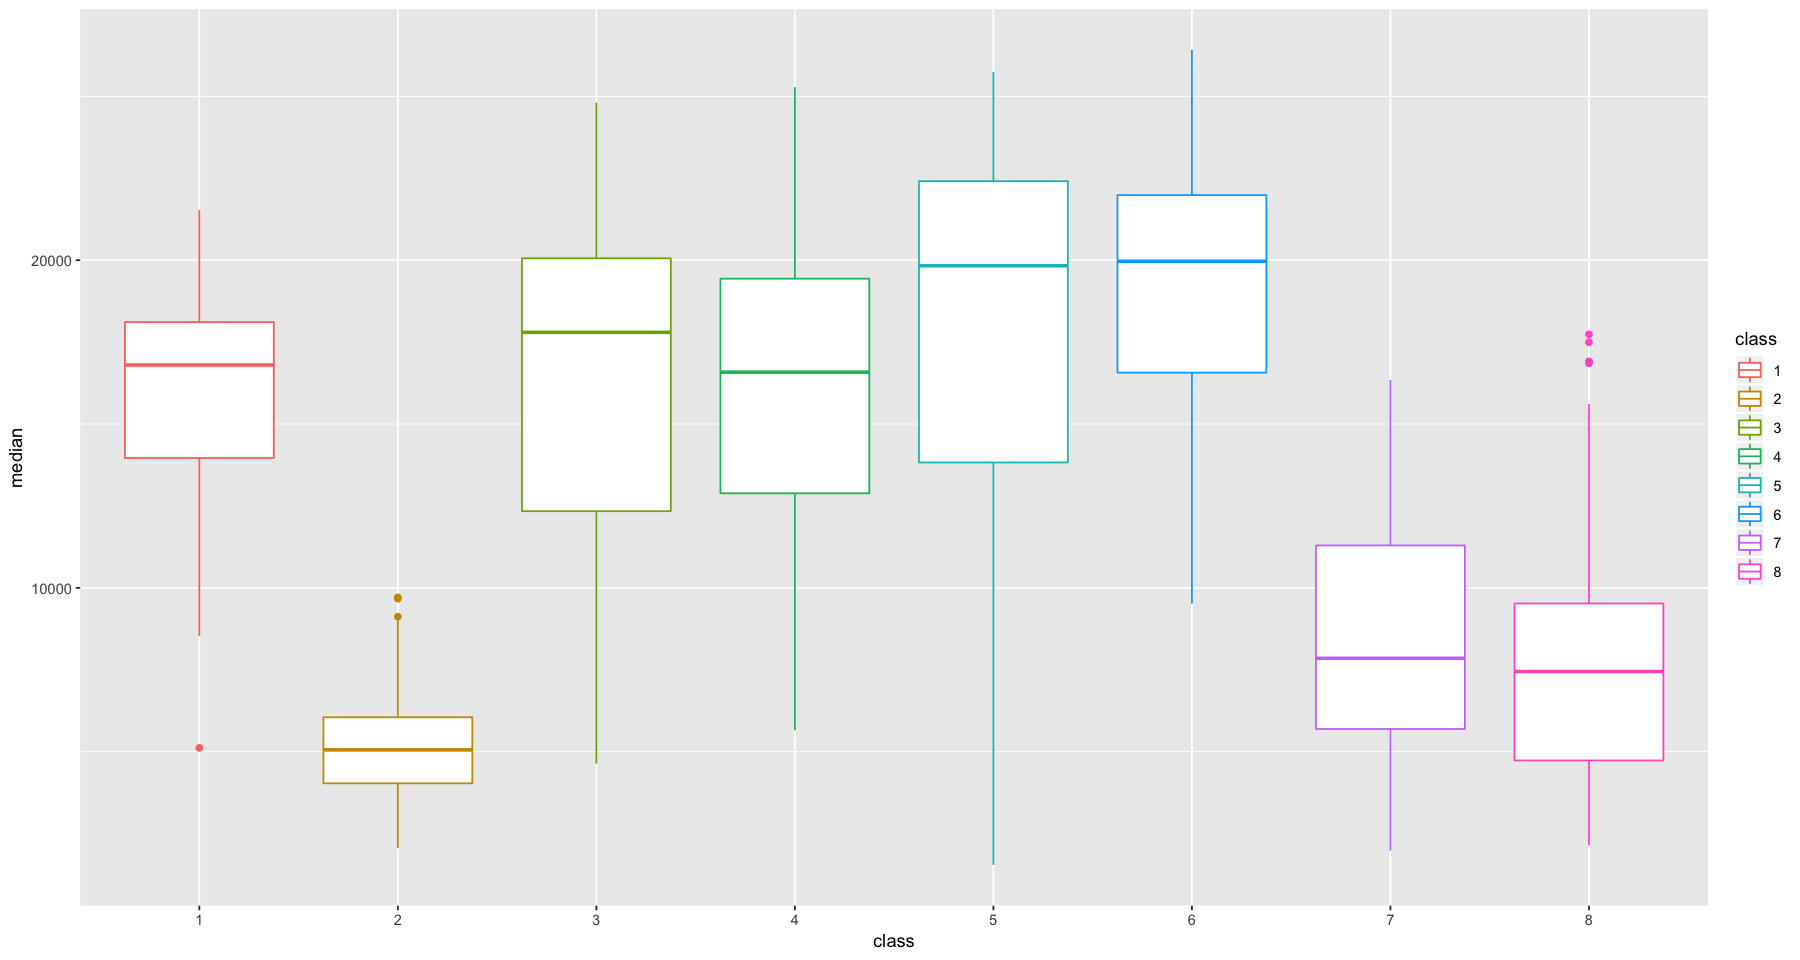

In [171]:
ggplot(stats, aes(x=class, y=median, color=class)) +
  geom_boxplot()

Segment based:
2 intervals are created for each time series.
And represent each series with the interval means.

In [172]:
long_train[,interval_id:=cut(time,2, ordered_result=T),by=list(id)]
str(long_train)
long_train[,interval_id:=as.numeric(interval_id)]
stats=long_train[,list(mean=mean(value),median=median(value),stdev=sd(value)),by=list(class,id,interval_id)]
head(stats)
interval_stats=dcast(stats,id+class~paste0('int_',interval_id),value.var='mean')
head(interval_stats)

ggplot(interval_stats,aes(x=int_1,y=int_2,color=class)) + geom_point(size = 3)

ggplot(data=interval_stats, aes(x=id, y=int_1,fill=class)) +
  geom_bar(stat="identity")

Classes ‘data.table’ and 'data.frame':	282240 obs. of  5 variables:
 $ id         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ time       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ value      : num  2.631 2.507 0.863 0.486 1.425 ...
 $ class      : chr  "6" "5" "5" "3" ...
 $ interval_id: Ord.factor w/ 2 levels "(0.686,158]"<..: 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


class,id,interval_id,mean,median,stdev
6,1,1,8364.701,7269.834,6627.842
5,2,1,9232.238,7631.081,7643.435
5,3,1,4712.686,3014.319,4591.817
3,4,1,3162.266,2142.349,3025.535
4,5,1,5379.748,4335.126,4548.565
8,6,1,4265.213,4098.973,3188.655


Represent each series with the interval median.

id,class,int_1,int_2
1,6,7269.834,27247.92
2,5,7631.081,34975.45
3,5,3014.319,27034.64
4,3,2142.349,15153.27
5,4,4335.126,27989.99
6,8,4098.973,10615.72


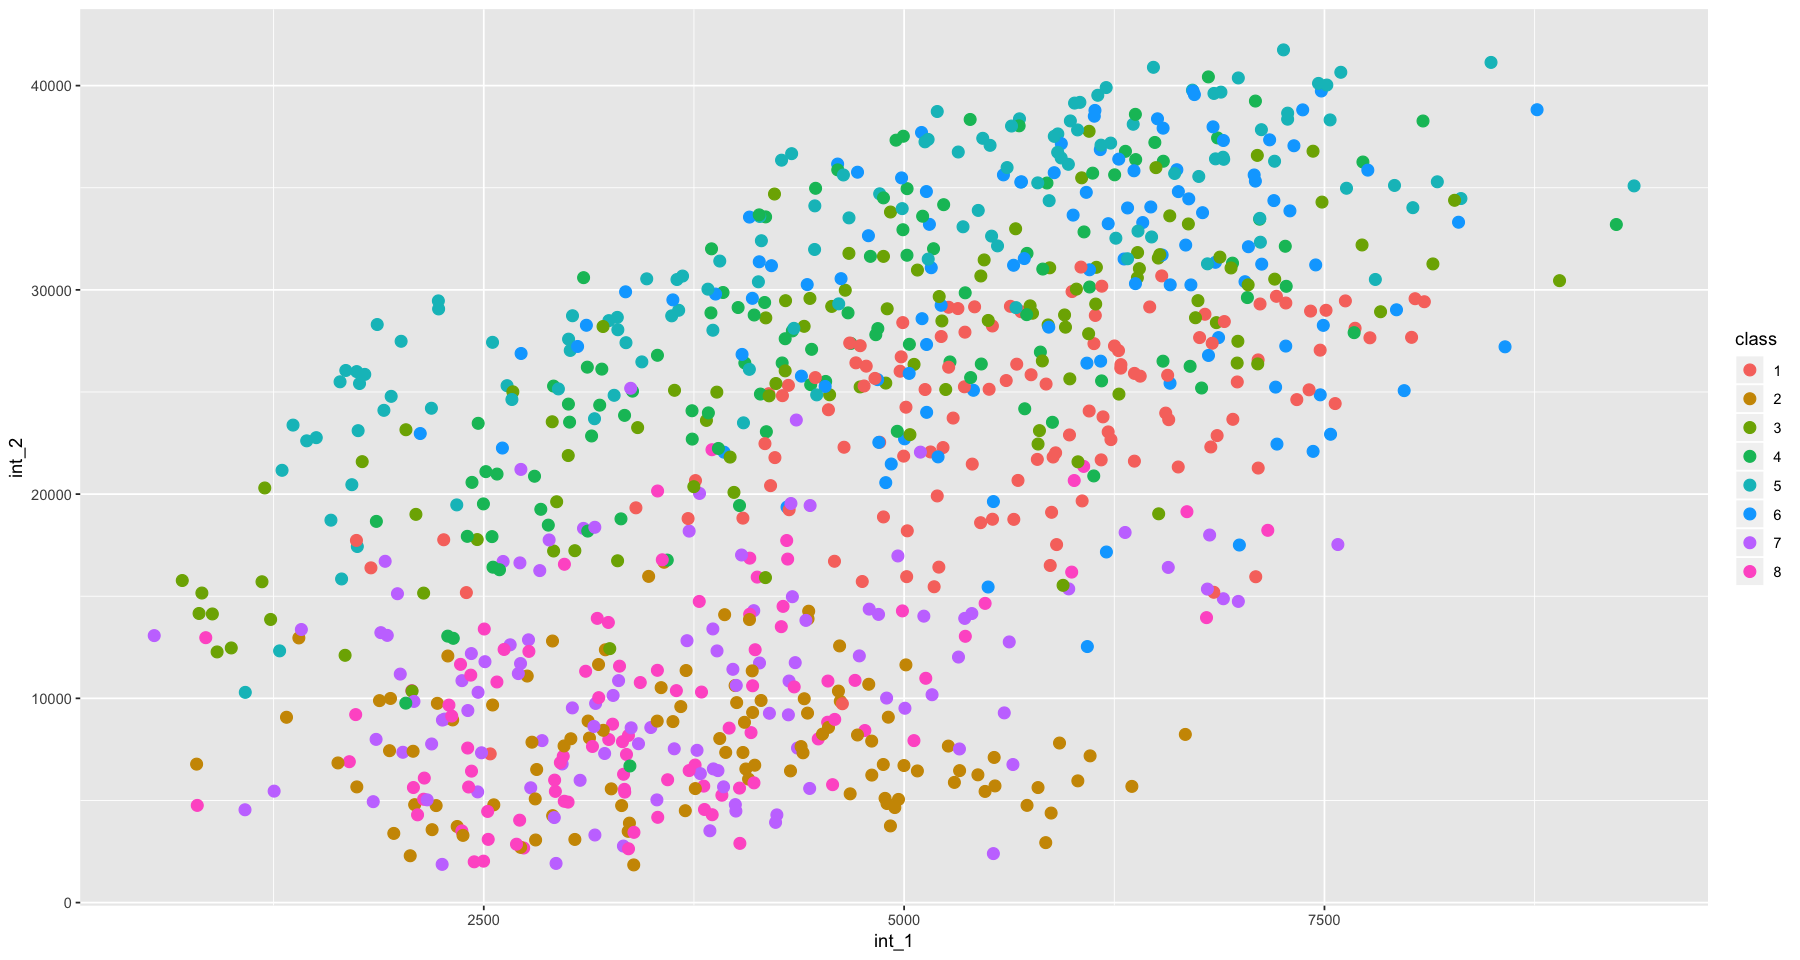

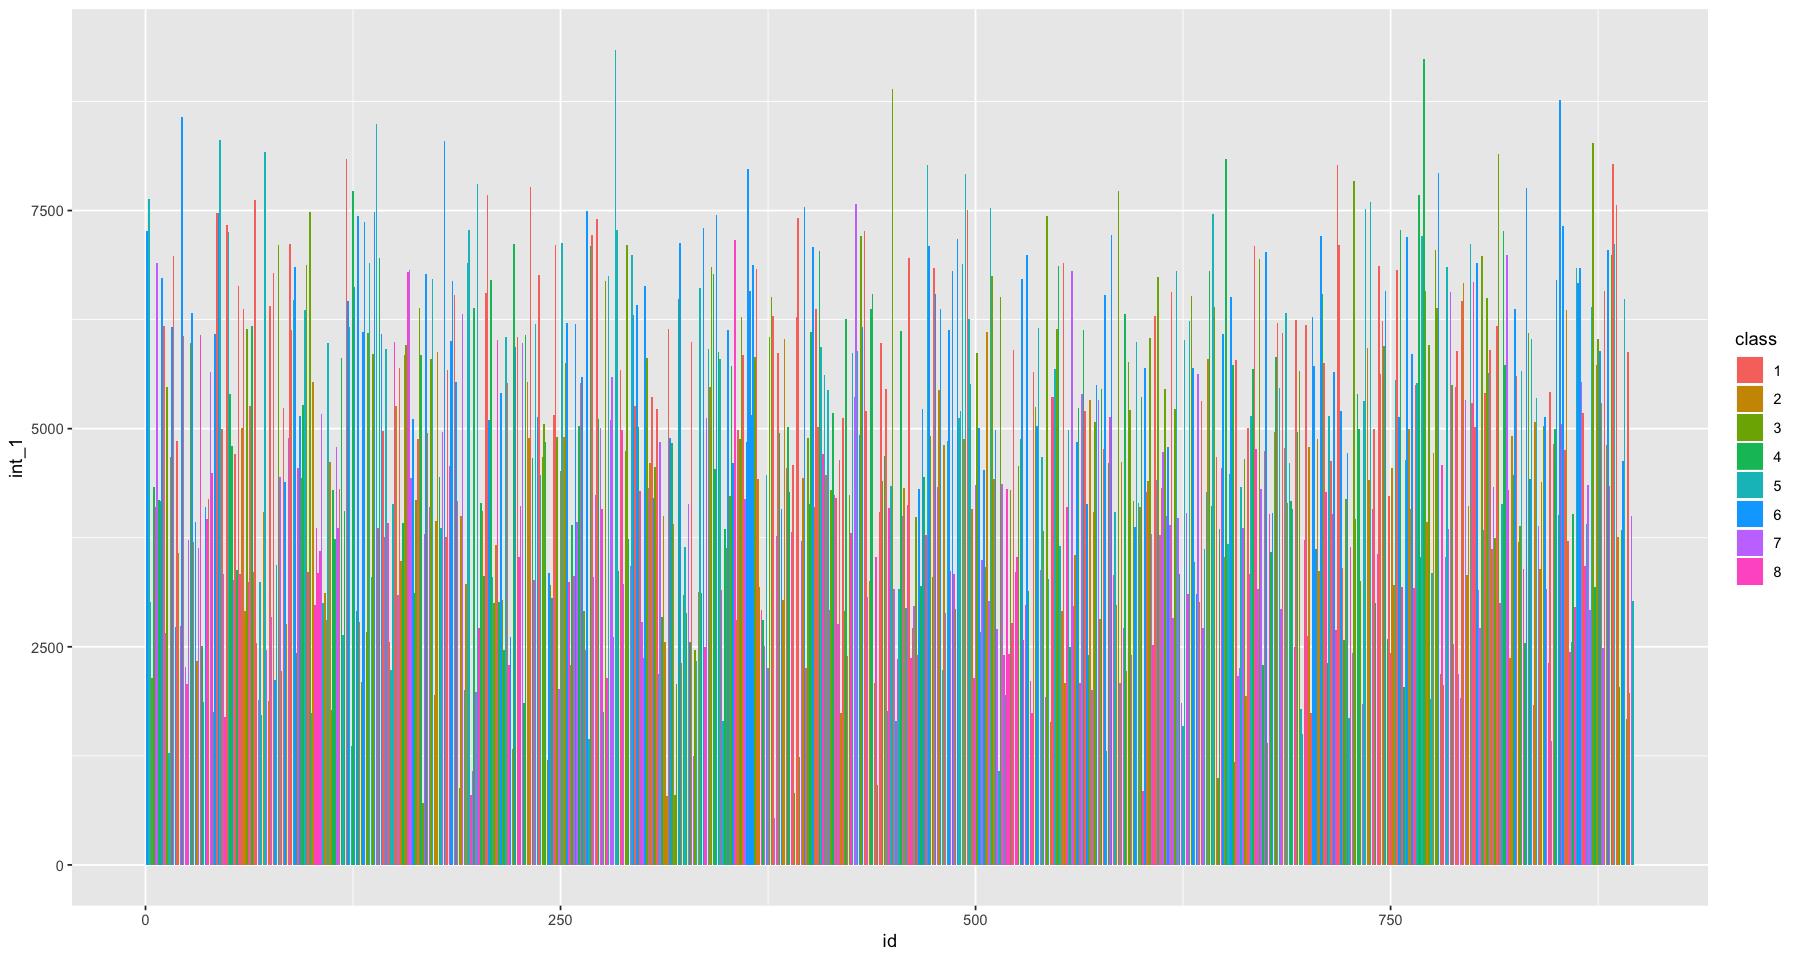

In [174]:
interval_stats=dcast(stats,id+class~paste0('int_',interval_id),value.var='median')
head(interval_stats)

ggplot(interval_stats,aes(x=int_1,y=int_2,color=class)) + geom_point(size = 3)

ggplot(data=interval_stats, aes(x=id, y=int_1,fill=class)) +
  geom_bar(stat="identity")

Model based:
Suppose each time series follow an autoregressive model
Model coefficients

id,time,value,class,interval_id,lag1_val,lag2_val
1,1,2.630995,6,1,NA,NA
1,2,7.892986,6,1,2.630995,NA
1,3,15.785972,6,1,7.892986,2.630995
1,4,26.309954,6,1,15.785972,7.892986
1,5,39.464931,6,1,26.309954,15.785972
1,6,55.250903,6,1,39.464931,26.309954


X.Intercept.,lag1_val,lag2_val
3.2964452,1.989703,-0.9898402
3.1512306,1.993705,-0.9938167
1.4382093,2.001013,-1.0011154
0.7603816,2.003102,-1.0032082
0.9743827,2.007018,-1.0071278
1.9741609,1.989143,-0.9893670


id,X.Intercept.,lag1_val,lag2_val,class
1,3.2964452,1.989703,-0.9898402,6
2,3.1512306,1.993705,-0.9938167,5
3,1.4382093,2.001013,-1.0011154,5
4,0.7603816,2.003102,-1.0032082,3
5,0.9743827,2.007018,-1.0071278,4
6,1.9741609,1.989143,-0.9893670,8


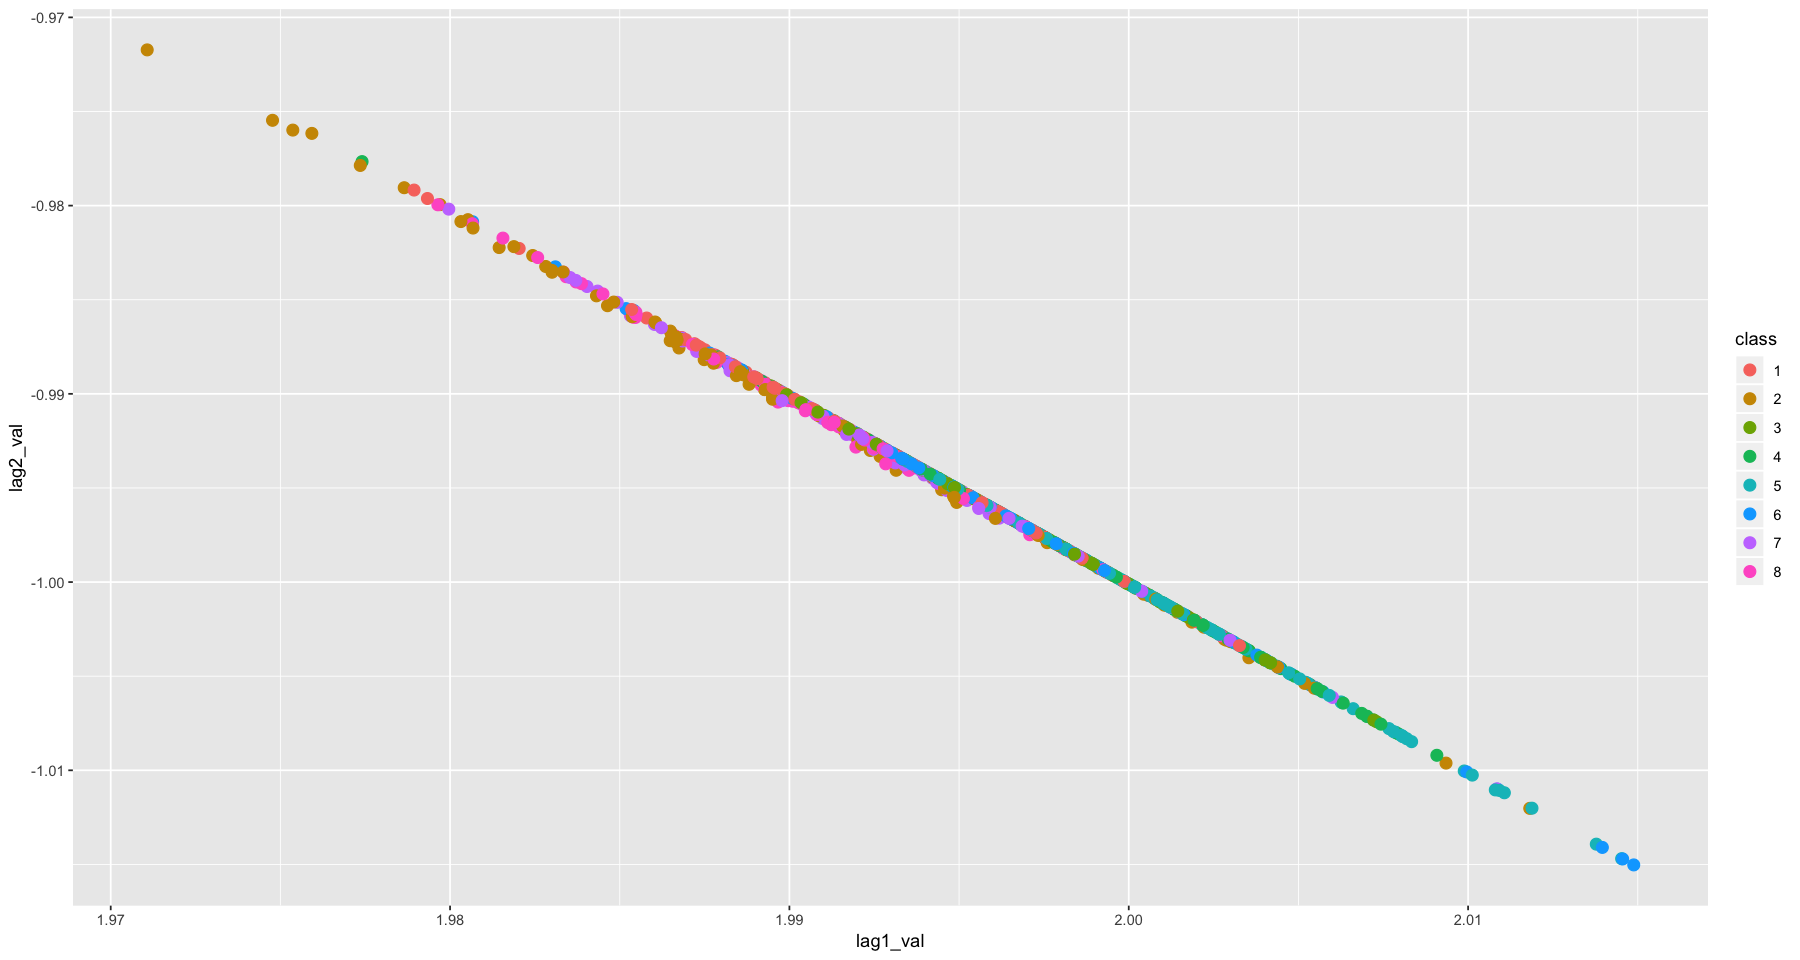

In [175]:
ar_long_train=copy(long_train)
ar_long_train=ar_long_train[order(id,time)]
ar_long_train[,lag1_val:=shift(value,1),by=list(id)]
ar_long_train[,lag2_val:=shift(value,2),by=list(id)]

head(ar_long_train)

series_id=unique(ar_long_train$id)

fit_ar2=function(dat){
    fit=lm(value~lag1_val+lag2_val,dat)
    return(data.frame(t(coef(fit))))
}
fitted_coef=lapply(series_id,function(x) fit_ar2(ar_long_train[id==x]))

coef_dt=rbindlist(fitted_coef)
                   
head(coef_dt)
                   
coef_dt[,id:=series_id] 
                   
coef_dt=merge(coef_dt,train_data[,list(id,class)],by='id')
head(coef_dt)
     
ggplot(coef_dt,aes(x=lag1_val,y=lag2_val,color=class)) + geom_point(size = 3)

Class based models:
This time classes of each time series follow autoregressive model of lag 2
Getting residuals ...

In [176]:
class_id=unique(ar_long_train$class)


fit_ar2=function(dat){
    fit=lm(value~lag1_val+lag2_val,dat)
    return(fit)
}
fitted_models=lapply(class_id,function(x) fit_ar2(ar_long_train[class==x]))

ar_train_with_predictions=copy(ar_long_train)                   
for(i in 1:length(class_id)){
    current_class=class_id[i]
    ar_train_with_predictions[,paste0('residual_',current_class):=value-predict(fitted_models[[i]],ar_train_with_predictions)] 
}
                     
head(ar_train_with_predictions)

id,time,value,class,interval_id,lag1_val,lag2_val,residual_6,residual_5,residual_3,residual_4,residual_8,residual_7,residual_1,residual_2
1,1,2.630995,6,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,2,7.892986,6,1,2.630995,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,3,15.785972,6,1,7.892986,2.630995,0.7863558,1.158413,1.240690,1.350337,1.920465,1.826523,0.9657509,1.781889
1,4,26.309954,6,1,15.785972,7.892986,0.7892496,1.153341,1.241418,1.345572,1.922832,1.828439,0.9735685,1.785289
1,5,39.464931,6,1,26.309954,15.785972,0.7924011,1.148519,1.242386,1.341051,1.925480,1.830637,0.9816485,1.789104
1,6,55.250903,6,1,39.464931,26.309954,0.7958102,1.143947,1.243595,1.336774,1.928409,1.833117,0.9899909,1.793333


id,class,m1,m2,m3
1,6,0.28215714,1.9428238,0.180243881
2,5,0.77630843,2.6171642,0.556792821
3,5,0.09343291,1.6137730,-0.009141225
4,3,-0.61824735,0.6192006,-0.566471870
5,4,0.22361056,1.7772411,0.077966727
6,8,-0.86817179,0.3314890,-0.721156094


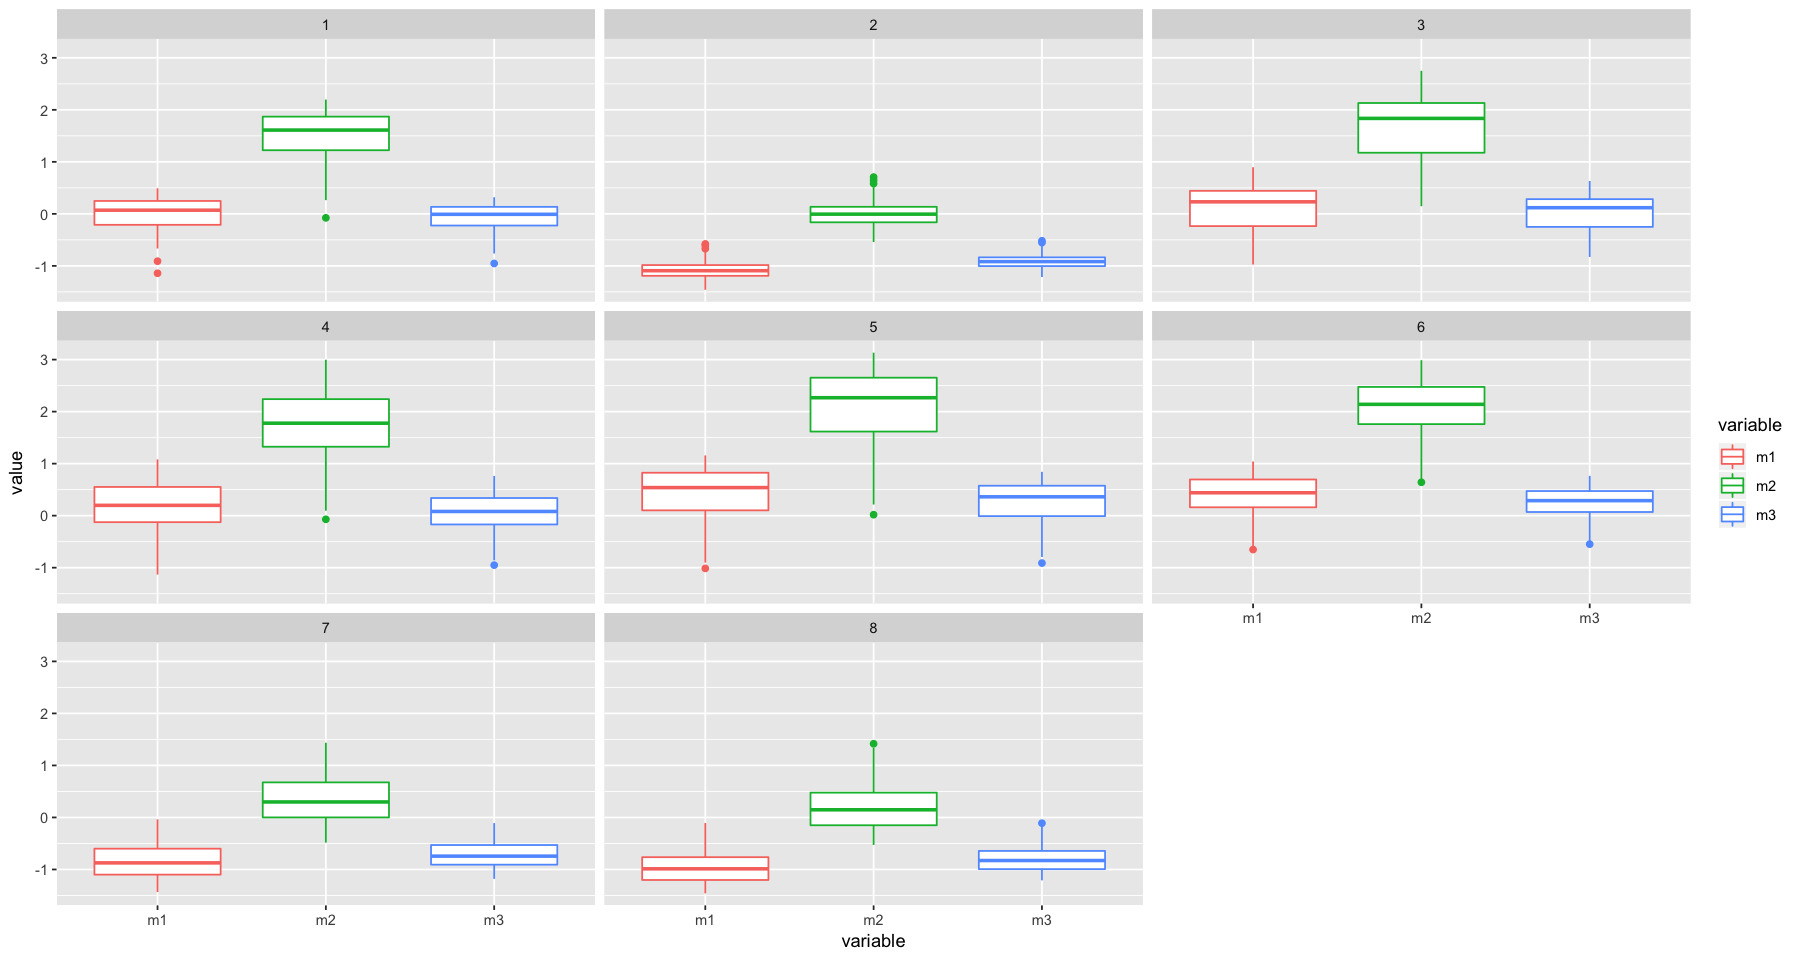

In [177]:
residual_stats=ar_train_with_predictions[,list(m1=mean(residual_1,na.rm=T),
                                m2=mean(residual_2,na.rm=T),
                                m3=mean(residual_3,na.rm=T)),by=list(id,class)]
head(residual_stats)

residual_stats=melt(residual_stats,id.vars=c('id','class'))

ggplot(residual_stats, aes(x=variable, y=value, color=variable)) +
  geom_boxplot() + facet_wrap(~class)